# Vision Transformer

A Vision Transformer (ViT) is a type of deep learning model specifically designed for image recognition tasks (Paper: [AN IMAGE IS WORTH 16X16 WORDS:
TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE by Dosovitskiy et al.](https://arxiv.org/pdf/2010.11929) ). It leverages the Transformer architecture, which was originally developed for natural language processing (NLP) tasks, to handle visual data.  As you may already know, Originally introduced in the paper "Attention is All You Need" by Vaswani et al., the Transformer architecture uses self-attention mechanisms to weigh the importance of different parts of the input data. This architecture has become the backbone of many NLP models like BERT and GPT. 

<p align="center">
<img src="./pic/vit.gif" width="800px"></img>
</p>

## Architecture 

Unlike convolutional neural networks (CNNs) that process images as a whole, ViTs divide an image into fixed-size patches (e.g., 16x16 pixels). Each patch is then flattened into a vector and linearly embedded into a higher-dimensional space. These embeddings are similar to word embeddings in NLP. 
The core component of the Transformer, the self-attention mechanism, allows the model to weigh the importance of different patches when making predictions. This mechanism helps the model focus on relevant parts of the image.

## Advantages
Unlike CNNs, which have built-in assumptions about local connectivity and spatial hierarchies, ViTs rely more on the data to learn overall features, which can be advantageous for learning complex patterns. The reason behind is due to their ability to model long-range dependencies and global context effectively due to the self-attention mechanism, which enables them to capture global context and relationships within the entire image, thus, can be beneficial for complex image understanding tasks.

Moreover, ViTs can scale up with more data and larger models, often outperforming CNNs in large-scale datasets. Pre-trained ViTs (e.g. CLIP, DINO) can be fine-tuned on specific tasks, making them versatile across different image recognition problems.

## Challenges

ViTs generally require large amounts of training data to perform well, as they do not have the same inductive biases as CNNs. Unlike CNNs, which have built-in assumptions about local connectivity and spatial hierarchies, ViTs rely more on learning these features from the data. This means they often need larger datasets to achieve comparable performance because they do not inherently exploit the local structure of images. Vits also benefit significantly from pre-training on large datasets (e.g., ImageNet) and then fine-tuning on specific tasks. Without access to large-scale pre-training, their performance can be suboptimal on smaller datasets.

In a word, the primary reasons for the challenges faced by Vision Transformers include their high data and computational requirements due to the lack of inductive biases, quadratic complexity of self-attention, and the need for extensive pre-training. These factors contribute to the increased demand for computational resources, longer training times, and the necessity for large-scale datasets to fully leverage their potential.


## Additional Resources

To have a better understanding on how general transformers work, you can have a look at the following videos (each video is about 25 minutes long): 

https://www.youtube.com/watch?v=wjZofJX0v4M

https://www.youtube.com/watch?v=eMlx5fFNoYc

https://www.youtube.com/watch?v=9-Jl0dxWQs8

To have get more insights on how Vision Transformers work, you can have a look at the following video (30min long):

https://www.youtube.com/watch?v=TrdevFK_am4

Hint: The videos are not mandatory for the exercise or exam, but they can help you to understand the concepts better.

# Implement Vision transformer from scratch

We will implement a simple Vision Transformer (ViT) from scratch using PyTorch. The goal is to understand the basic components and how they fit together to form a complete model.
You can find the complete code also here: [vit.py](https://github.com/lucidrains/vit-pytorch/blob/main/vit_pytorch/vit.py)

<p align="center">
<img src="./pic/vit.png" width="800px"></img>
</p>

Install and import the necessary packages:

In [ ]:
! pip install torch
! pip install einops
import torch
from torch import nn

from einops import rearrange, repeat
from einops.layers.torch import Rearrange


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\qs9960\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\qs9960\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Feedforward

Let's start by define the feedforward sublayer (Norm + MLP), which is applied independently to each position in the sequence. This component consists of two linear layers with a non-linear activation in between—typically a GELU or ReLU—along with layer normalization and dropout for regularization. While the attention mechanism captures dependencies between tokens, the feedforward network helps transform and enrich token representations locally. In this section, you’ll implement the `FeedForward` class used in each Transformer layer.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        
        ###########
        # TODO This feedforward network basically consists of: 
        self.net = nn.Sequential(
        # 1. layer normalization, 
        # 2. linear, 
        # 3. gelu, 
        # 4. dropout, 
        # 5. linear,
        # 6. dropout.
        )
        ###########

    def forward(self, x):
        return self.net(x)

### Multi-head Self-attention block
Lets define the Multi-head Self-attention block, remember the general attention formula:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d}}\right)V$$

This formula forms the core of the self-attention mechanism used in Transformer models. In this section, you'll implement a PyTorch module that extends this idea to multi-head attention, where multiple attention "heads" run in parallel to capture diverse patterns in the input. We'll also incorporate *layer normalization*, *dropout*, and *linear projections* to match the architecture used in modern Transformers.

In [ ]:
class Attention(nn.Module):
    def __init__(self, dim, heads=8, dim_head=64, dropout=0.):
        super().__init__()
        inner_dim = dim_head * heads
        project_out = not (heads == 1 and dim_head == dim)

        self.heads = heads
        
        ###########
        # TODO: finish following setups
        self.scale =   # Scaling factor for the dot product

        self.norm =  # Layer normalization before attention

        self.softmax = # Softmax for attention scores
        self.dropout = # Dropout for regularization

        self.to_qkv = # Linear layer to project input to queries, keys, and values

        self.to_out = nn.Sequential(
           # Output projection, includes a linear layer followed by dropout if projection is needed
        ) if project_out else nn.Identity()
        ###########

    def forward(self, x):
        ###########
        # TODO: finish feed forward procedure
        x =  # Apply layer normalization

        qkv =   # Project input to queries, keys, and value, and split into query, key, value
        q, k, v =   # Rearrange for multi-head attention

        # Compute scaled dot-product attention
        dots = # Matrix multiplication of queries and keys

        
        attn = # Apply softmax to get attention scores
        attn = # Apply dropout to attention scores

        # Compute the attention output
        out = # Multiply attention scores with values
         # Rearrange back to original shape
        
        ###########

        return self.to_out(out)  # Apply the output projection

### Transformer Block

Now that we've built the multi-head self-attention mechanism, it's time to combine it with a feedforward network to form a full Transformer block. A Transformer block consists of alternating layers of multi-head attention and position-wise feedforward networks, each followed by residual connections and layer normalization. Stacking several of these blocks allows the model to learn complex patterns and long-range dependencies in the input. In this section, you’ll implement the `Transformer` class, which chains multiple such blocks together to form the core of the Transformer architecture.

In [5]:

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout = 0.):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Attention(dim, heads = heads, dim_head = dim_head, dropout = dropout),
                FeedForward(dim, mlp_dim, dropout = dropout)
            ]))

    def forward(self, x):
        ###########
        # TODO: finish feed forward procedure
        
        ###########

        return self.norm(x)

### Vision Transformer (ViT) Model
With all the building blocks in place—feedforward networks, multi-head self-attention, and Transformer layers—we’re ready to assemble the full Vision Transformer (ViT). The ViT model applies the Transformer architecture, originally designed for language, to image data by first splitting the image into fixed-size patches, embedding them into a sequence of vectors, and then processing them with a standard Transformer. A special [CLS] token or the mean of the patch tokens is used to represent the whole image for classification. In this final section, you'll implement the `ViT` class, which brings together everything you've built into a powerful image classification model.

In [ ]:
class ViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, pool='cls', channels=3, dim_head=64, dropout=0., emb_dropout=0.):
        super().__init__()
        
        # Calculate image dimensions if provided as a tuple, otherwise use the same value for height and width
        image_height, image_width = image_size if isinstance(image_size, tuple) else (image_size, image_size)
        patch_height, patch_width = patch_size if isinstance(patch_size, tuple) else (patch_size, patch_size)

        # Ensure that the image dimensions are divisible by the patch size
        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        # Calculate the number of patches and the dimension of each patch
        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width

        # Ensure the pooling method is either 'cls' (using class token) or 'mean' (mean pooling)
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'

        # Patch embedding: rearrange image to patches, normalize, and apply linear transformation
        self.to_patch_embedding = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_height, p2=patch_width),
            nn.LayerNorm(patch_dim),
            nn.Linear(patch_dim, dim),
            nn.LayerNorm(dim),
        )

        #########
        # TODO: Create embeddings and tokens
        # Positional embedding and class token initialization
        self.pos_embedding = 
        self.cls_token = 
        self.dropout = nn.Dropout(emb_dropout)
        #########

        # Transformer encoder
        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)

        # Pooling method
        self.pool = pool
        self.to_latent = nn.Identity()

        # Final classification head
        self.mlp_head = nn.Linear(dim, num_classes)

    def forward(self, img):
        # Convert image to patch embeddings
        x = self.to_patch_embedding(img)
        b, n, _ = x.shape

        ###########
        # TODO: finish feed forward procedure
        # Expand the class token and concatenate with patch embeddings (for each sample in batch)
        cls_tokens = 
        x = 
        
        # Add positional embedding and apply dropout
        x += 
        x = self.dropout(x)

        # Pass through the transformer
        x = self.transformer(x)

        # Apply pooling based on pool parameter
        x = 
        ###########
        
        # Final layer before classification
        x = self.to_latent(x)
        
        return self.mlp_head(x)

### Now let's try to test our model

In [13]:
def test():
    v = ViT(
        image_size = 256,
        patch_size = 32,
        num_classes = 1000,
        dim = 1024,
        depth = 6,
        heads = 16,
        mlp_dim = 2048,
        dropout = 0.1,
        emb_dropout = 0.1
    )

    img = torch.randn(1, 3, 256, 256)

    preds = v(img)
    assert preds.shape == (1, 1000), 'correct logits outputted'
    print("Test passed.")

test()

NameError: name 'ViT' is not defined

# Pretrained Vision Transformer

As training a Vision Transformer from scratch can be computationally expensive and requires large datasets, we will use a pre-trained model. Pre-trained models are trained on large datasets (like ImageNet) and can be fine-tuned for specific tasks. This allows us to leverage the learned features without needing to train the model from scratch. We use directly the pretrained model from the [`timm` library](https://paperswithcode.com/lib/timm/vision-transformer) and use it to classify an image. The `timm` library provides a wide range of pre-trained models, including Vision Transformers, and simplifies the process of loading and using them.

In [ ]:
! pip install timm


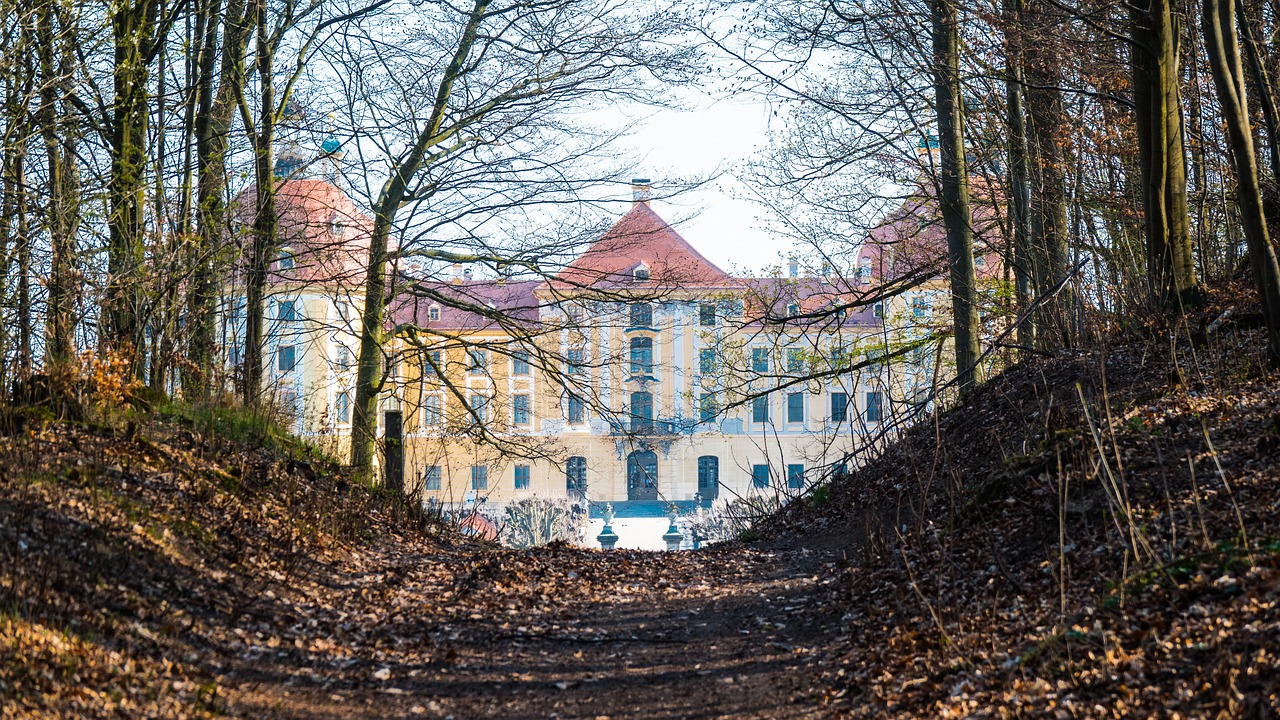

In [31]:
from PIL import Image
#image_path = "./images/house.jpg"
#image_path = "./images/plane.jpg"
image_path = "./images/castle.jpg"
image = Image.open(image_path)
image

We load a small ViT model that was pretrained for image classification on ImageNet. The model is designed to take images of size 224x224 pixels and classify them into one of the 1000 classes in the ImageNet dataset. You can change to a different model by changing the `model_name` parameter in the `timm.create_model` function. See all available models in the [here](https://paperswithcode.com/lib/timm/vision-transformer).

In [33]:
import torch
import timm
model = timm.create_model(model_name='vit_small_patch16_224', pretrained=True)
model.eval()
transform = timm.data.create_transform(
    **timm.data.resolve_data_config(model.pretrained_cfg)
)

# We can prepare this image for the model by passing it to the transform.
image_tensor = transform(image)
print("image_tensor shape: ", image_tensor.shape)

# Now we can pass that image to the model to get the predictions. We use unsqueeze(0) in this case, as the model is expecting a batch dimension. 
output = model(image_tensor.unsqueeze(0))
print("Output shape: ", output.shape)

# To get the predicted probabilities, we apply softmax to the output. This leaves us with a tensor of shape (num_classes,).
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print("probabilities shape: ", probabilities.shape)

# Now we’ll find the top 5 predicted class indexes and values using torch.topk.
values, indices = torch.topk(probabilities, 5)
print("TOP5 class indices: ", indices)

# If we check the imagenet labels for the top index, we can see what the model predicted…
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')
print("TOP5 classes:")
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

image_tensor shape:  torch.Size([3, 224, 224])
Output shape:  torch.Size([1, 1000])
probabilities shape:  torch.Size([1000])
TOP5 class indices:  tensor([698, 483, 663, 743, 839])
TOP5 classes:


[{'label': 'palace', 'value': 0.4768460988998413},
 {'label': 'castle', 'value': 0.42220404744148254},
 {'label': 'monastery', 'value': 0.033644143491983414},
 {'label': 'prison, prison_house', 'value': 0.015946660190820694},
 {'label': 'suspension_bridge', 'value': 0.006683832034468651}]